In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [55]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [57]:
df.isna().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [60]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease'].map({'Presence' : 1, 'Absence' : 0})

In [61]:
y.value_counts(normalize=True)

,proportion
Heart Disease,
0,0.555556
1,0.444444


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [64]:
grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = param_grid,
    scoring='recall',
    n_jobs=-1,
    cv=5
)

In [65]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [66]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [80]:
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=4,
                               min_samples_leaf=1,
                               min_samples_split=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [81]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_pred, y_test)
prec = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)

print("Test Evaluataions: ")
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1 score: ", f1)
print("Confusion Matrix: \n", cm)

Test Evaluataions: 
Accuracy:  0.8148148148148148
Precision:  0.6666666666666666
Recall:  0.8235294117647058
F1 score:  0.7368421052631579
Confusion Matrix: 
 [[30  7]
 [ 3 14]]


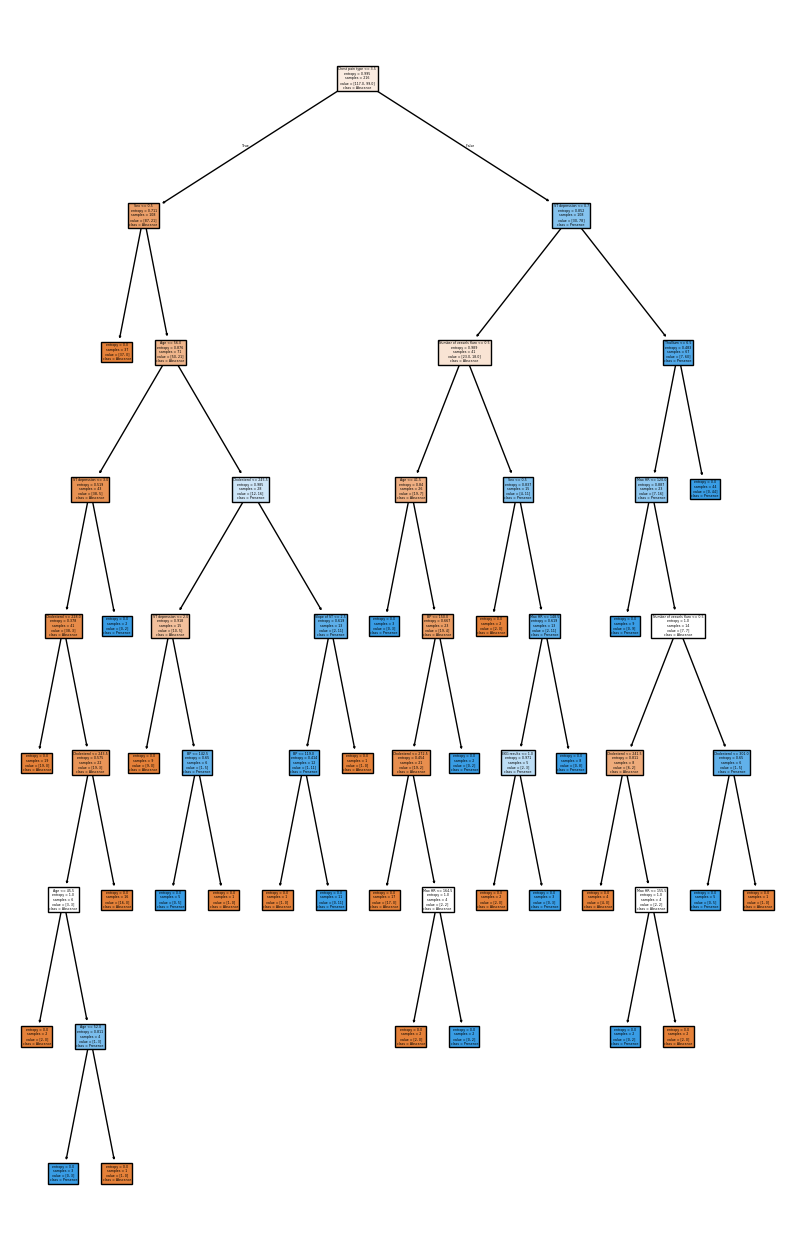

In [79]:
plt.figure(figsize=(10, 16))
plot_tree(model, feature_names=X.columns, filled=True, class_names=['Abscence', 'Presence'])
plt.show()